<a href="https://colab.research.google.com/github/Namtk214/AIO-Homework/blob/main/Module4_week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gdown 1FdydikIZfRaENz3CLaZT24Deyc4KvZO3

Downloading...
From: https://drive.google.com/uc?id=1FdydikIZfRaENz3CLaZT24Deyc4KvZO3
To: /content/advertising.csv
100% 4.06k/4.06k [00:00<00:00, 9.33MB/s]


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

#def get_column(data, index):


In [3]:
df = pd.read_csv('/content/advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
data = np.genfromtxt('/content/advertising.csv', delimiter=',', skip_header=1)
data[:5]

array([[230.1,  37.8,  69.2,  22.1],
       [ 44.5,  39.3,  45.1,  10.4],
       [ 17.2,  45.9,  69.3,  12. ],
       [151.5,  41.3,  58.5,  16.5],
       [180.8,  10.8,  58.4,  17.9]])

In [5]:
#Question 1

print(df['TV'][:5].sum())


624.1


In [6]:
X = data[:, :3]
y = data[:, 3]
sum(y[:5])


78.9

In [7]:
def get_column(data, index):
  result = [row[index] for row in data]
  return result

def prepare_data(file_name):
  data = np.genfromtxt(file_name, delimiter=',', skip_header=1)
  N = len(data)
  tv_data = get_column(data, 0)
  radio_data = get_column(data, 1)
  newspaper_data = get_column(data, 2)
  sales_data = get_column(data, 3)
  X =[tv_data,radio_data, newspaper_data]
  y = sales_data
  return X, y


Exercise 2:

In [8]:
def initialize_params():
  # w1 = random.gauss(mu=0, sigma=0.01)
  # w2 = random.gauss(mu=0, sigma=0.01)
  # w3 = random.gauss(mu=0, sigma=0.01)
  # b=0
  w1, w2, w3, b = (0.016992259082509283 , 0.0070783670518262355 ,-0.002307860847821344 , 0)

  return w1, w2, w3, b

In [9]:
def predict(x1, x2, x3, w1, w2, w3, b):
  return w1 * x1 + w2 * x2 + w3 * x3 + b
print(predict(1, 1, 1, 0, 0.5, 0, 0.5))

1.0


In [10]:
def compute_loss(y, y_hat):
  return (y - y_hat) ** 2
print(compute_loss(1, 0.5))

0.25


In [11]:
def compute_gradient_wi(x, y, y_hat):
  return -2 * x * (y - y_hat)

def compute_gradient_b(y, y_hat):
  return -2 * (y - y_hat)
print(compute_gradient_wi(1, 1, 0.5))
print(compute_gradient_b(2, 0.5))

-1.0
-3.0


In [12]:
def update_weight_wi(w, dl_dw, lr):
  return w - lr * dl_dw

def update_weight_b(b, dl_db, lr):
  return b - lr * dl_db

print(update_weight_wi(1, -0.5, 1e-5))
print(update_weight_b(0.5, -1, 1e-5))

1.000005
0.50001


In [34]:
#Linear regression using one sample per epoch
def implement_linear_regression(X_data, y_data, epoch_max = 1000, lr = 1e-5):
  losses = []
  w1, w2, w3, b = initialize_params()
  N = len(y_data)
  for epoch in range(epoch_max):
    for i in range(N):
      #Get sample
      x1 = X_data[0][i]
      x2 = X_data[1][i]
      x3 = X_data[2][i]
      y = y_data[i]
      #Compute output
      y_hat = predict(x1, x2, x3, w1, w2, w3, b)
      #Compute loss
      loss = compute_loss(y, y_hat)

      #Compute gradient w1, w2, w3, b
      dl_dw1 = compute_gradient_wi(x1, y, y_hat)
      dl_dw2 = compute_gradient_wi(x2, y, y_hat)
      dl_dw3 = compute_gradient_wi(x3, y, y_hat)
      dl_db = compute_gradient_b( y, y_hat)
      #Update parameters
      w1 = update_weight_wi(w1, dl_dw1, lr)
      w2 = update_weight_wi(w2, dl_dw2, lr)
      w2 = update_weight_wi(w3, dl_dw3, lr)
      w2 = update_weight_wi(b, dl_db, lr)

      losses.append(loss)
  return w1, w2, w3, b, losses

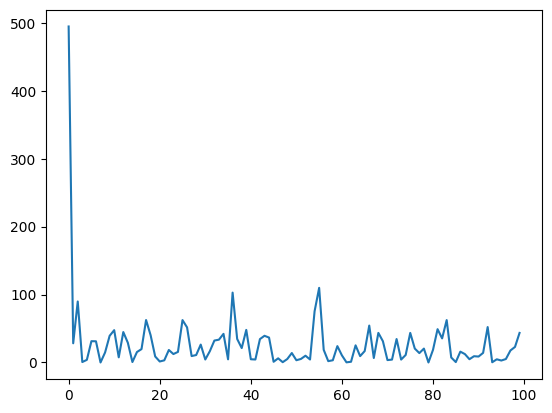

In [35]:
X, y = prepare_data('/content/advertising.csv')
w1, w2, w3, b, losses =implement_linear_regression(X, y)
plt.plot(losses[:100])
plt.show()

In [36]:
X, y = prepare_data('/content/advertising.csv')
w1, w2, w3, b, losses =implement_linear_regression(X, y)
print(w1, w2, w3)

0.07846104761130392 0.007359627335376322 0.004752496982185252


In [38]:
sales = predict(19.2, 35.9, 51.3, w1, w2, w3, b)
print(sales)

2.0218454478170127


Exercise 3:

In [16]:
# def compute_loss_mse(y, y_hat):
#   return (y - y_hat) ** 2

In [31]:
def implement_linear_regression_nsamples(X_data, y_data, epoch_max = 1000, lr = 1e-5):
  losses = []
  w1, w2, w3, b = initialize_params()
  N = len(y_data)
  for epoch in range(epoch_max):
    loss_total = 0
    dw1_total = 0
    dw2_total = 0
    dw3_total = 0
    db_total = 0
    for i in range(N):
      #get a sample
      x1 = X_data[0][i]
      x2 = X_data[1][i]
      x3 = X_data[2][i]
      y = y_data[i]
      #compute output
      y_hat = predict(x1, x2, x3, w1, w2, w3, b)
      #compute loss
      loss = compute_loss(y, y_hat)
      loss_total += loss
      #compute gradient
      dw1 = compute_gradient_wi(x1, y, y_hat)
      dw2 = compute_gradient_wi(x2, y, y_hat)
      dw3 = compute_gradient_wi(x3, y, y_hat)
      db = compute_gradient_b(y, y_hat)
      dw1_total += dw1
      dw2_total += dw2
      dw3_total += dw3
      db_total += db
    #update parameters
    w1 = update_weight_wi(w1, dw1_total/N, lr)
    w2 = update_weight_wi(w2, dw2_total/N, lr)
    w3 = update_weight_wi(w3, dw3_total/N, lr)
    b = update_weight_b(b, db_total/N, lr)
    losses.append(loss_total)
  return w1, w2, w3, b, losses


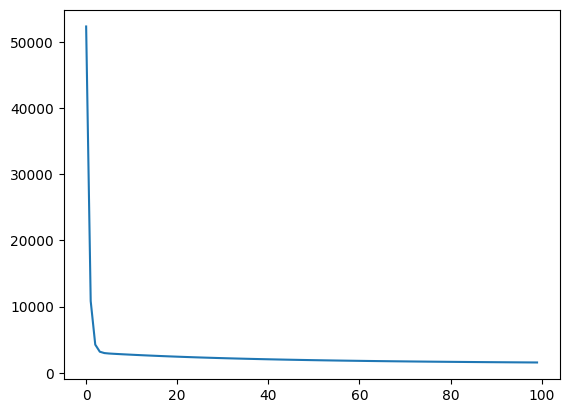

In [32]:
w1, w2, w3, b, losses = implement_linear_regression_nsamples(X, y)
plt.plot(losses[:100])
plt.show()

In [33]:
print(w1, w2, w3)

0.06710223117741336 0.15707648922831777 0.029794513385609844


Exercise 4: